In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
sns.set()
import numpy as np # linear algebra
 # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  *
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import DenseNet121, VGG19
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import PIL.Image
import matplotlib.pyplot as mpimg
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,img_to_array


from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import shuffle
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 


In [2]:
train_df = pd.read_csv(r"datasets_562468_1022626_Chest_xray_Corona_Metadata.csv")

train_df.shape

(5910, 6)

In [3]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


### 2.Missing Values

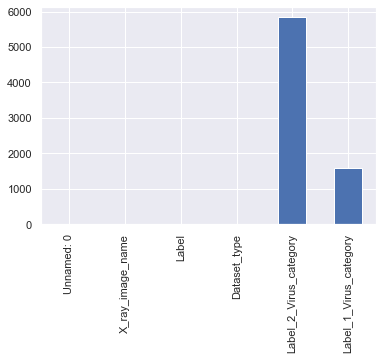

In [5]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [6]:
train_df.dropna(how = 'all')
train_df.isnull().sum()


Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [7]:
#impute unknown to null data points, we don't wanna see those ugly null values
train_df.fillna('unknown', inplace=True)
train_df.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [8]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5296,5319,IM-0009-0001.jpeg,Normal,TEST,unknown,unknown
5539,5562,person1612_virus_2798.jpeg,Pnemonia,TEST,unknown,Virus
5630,5653,person127_bacteria_604.jpeg,Pnemonia,TEST,unknown,bacteria
5313,5336,NORMAL2-IM-0033-0001.jpeg,Normal,TEST,unknown,unknown
5384,5407,NORMAL2-IM-0327-0001.jpeg,Normal,TEST,unknown,unknown
5358,5381,IM-0045-0001.jpeg,Normal,TEST,unknown,unknown
5632,5655,person127_bacteria_602.jpeg,Pnemonia,TEST,unknown,bacteria
5626,5649,person128_bacteria_608.jpeg,Pnemonia,TEST,unknown,bacteria
5885,5908,person1661_virus_2873.jpeg,Pnemonia,TEST,unknown,Virus
5510,5533,NORMAL2-IM-0348-0001.jpeg,Normal,TEST,unknown,unknown


### Let's fill the missing values with 'unknown'

## 3.Understanding some cols

In [9]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())

bacteria          2777
unknown           1576
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------
unknown          5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64


### Label_2 virus category consists of COVID-19 cases!!

## Let's Visualize Label_2 virus category

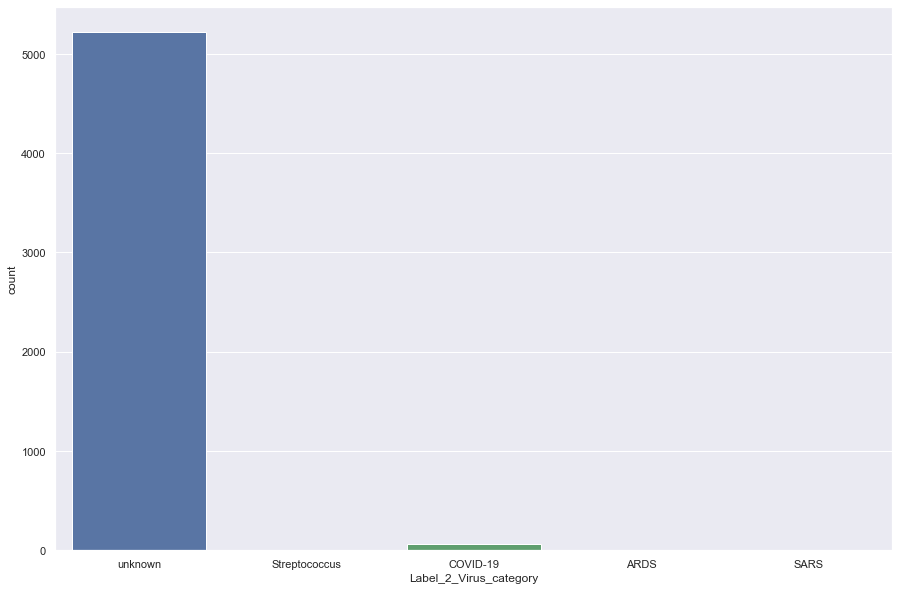

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Label_2_Virus_category']);

### 4. Display Images

In [11]:
train=os.path.join(os.path.dirname(r"C:\Users\anita\Downloads\561588_1020806_bundle_archive\xray_dataset_covid19\test"), 'test')
test=os.path.join(os.path.dirname(r"C:\Users\anita\Downloads\561588_1020806_bundle_archive\xray_dataset_covid19\train"), 'train')

test_img_dir=os.path.join(os.path.dirname("Coronahack-Chest-XRay-Dataset\\test"), 'test')
train_img_dir = os.path.join(os.path.dirname("Coronahack-Chest-XRay-Dataset\\train"), 'train')

print(len(os.listdir(train)))
print(len(os.listdir(test)))

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))

2
2


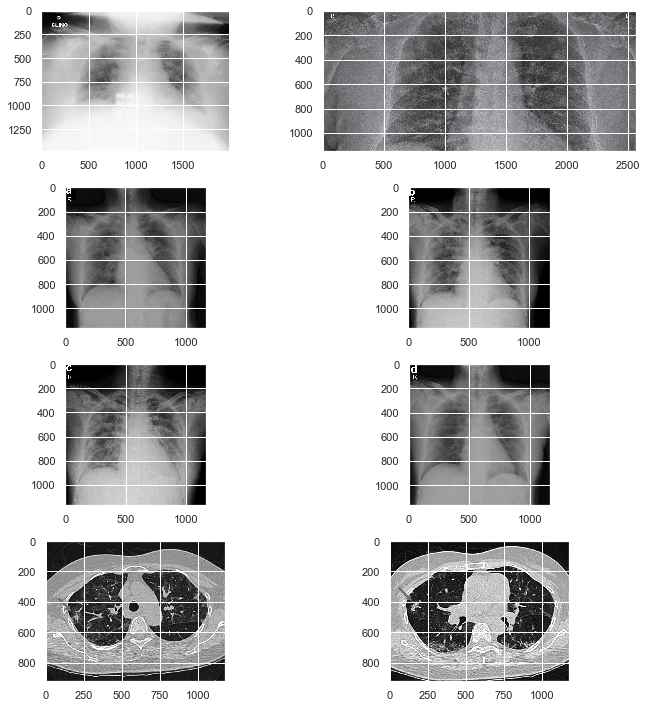

In [12]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_train_images):
    image = PIL.Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()

### Histogram analysis of Images

#### For COVID-19 cases

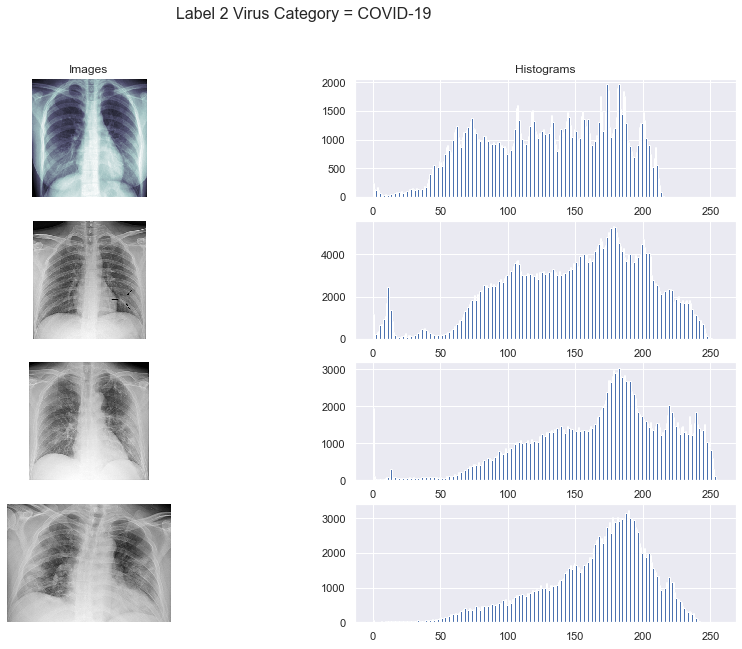

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


covid_path = train_data[train_data['Label_2_Virus_category']=='COVID-19']['X_ray_image_name'].values

sample_covid_path = covid_path[:4]
sample_covid_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_covid_path))

for row, file in enumerate(sample_covid_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label 2 Virus Category = COVID-19', size=16)
plt.show()

#### Normal Histogram images

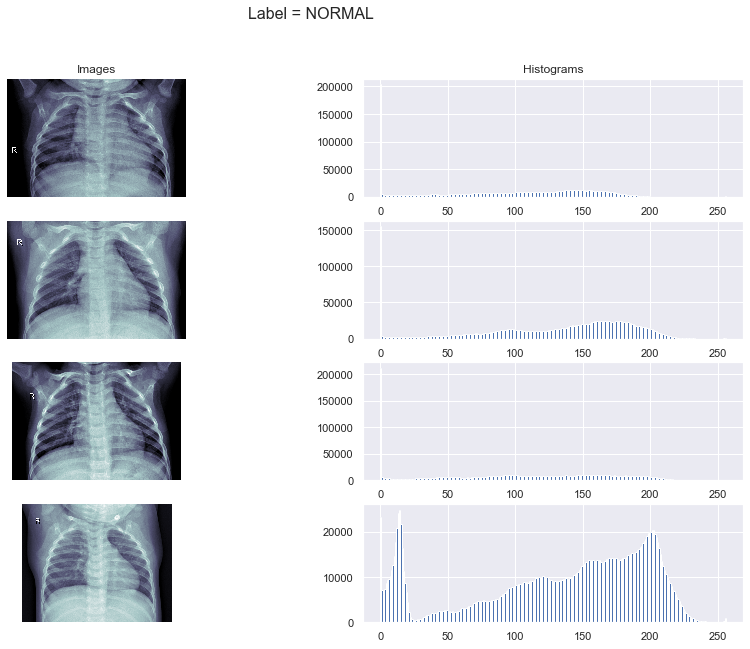

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


normal_path = train_data[train_data['Label']=='Normal']['X_ray_image_name'].values

sample_normal_path = normal_path[:4]
sample_normal_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_normal_path))

for row, file in enumerate(sample_normal_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()

### 5. Image Augmentation

In [15]:
#remove Pnuemonia with unknown value
final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') &
                               (train_data['Label_2_Virus_category'] == 'COVID-19'))]

# add a target and class feature
final_train_data['class'] = final_train_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
test_data['class'] = test_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')

final_train_data['target'] = final_train_data.Label.apply(lambda x: 0 if x=='Normal' else 1)
test_data['target'] = test_data.Label.apply(lambda x: 0 if x=='Normal' else 1)
#get the important features
final_train_data = final_train_data[['X_ray_image_name', 'class', 'target', 'Label_2_Virus_category']]
final_test_data = test_data[['X_ray_image_name', 'class', 'target']]

test_data['Label'].value_counts()

Pnemonia    390
Normal      234
Name: Label, dtype: int64

### Form CNN 

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [17]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [18]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [19]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)       

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen =ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 40 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [22]:
history=model.fit(train_generator,
epochs = 10,
validation_data = validation_generator
                 )

Epoch 1/10
2/2 [==============================] - 17s 9s/step - loss: 3.0019 - acc: 0.4500 - val_loss: 1.4670 - val_acc: 0.5000
Epoch 2/10
2/2 [==============================] - 13s 7s/step - loss: 0.9949 - acc: 0.5000 - val_loss: 0.7854 - val_acc: 0.5000
Epoch 3/10
2/2 [==============================] - 14s 7s/step - loss: 0.6838 - acc: 0.7000 - val_loss: 1.1547 - val_acc: 0.5000
Epoch 4/10
2/2 [==============================] - 14s 7s/step - loss: 0.7014 - acc: 0.6000 - val_loss: 0.4627 - val_acc: 0.8716
Epoch 5/10
2/2 [==============================] - 13s 7s/step - loss: 0.2160 - acc: 1.0000 - val_loss: 2.1505 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 13s 7s/step - loss: 1.6573 - acc: 0.5500 - val_loss: 0.3660 - val_acc: 0.8649
Epoch 7/10
2/2 [==============================] - 13s 6s/step - loss: 0.1336 - acc: 1.0000 - val_loss: 0.3149 - val_acc: 0.8446
Epoch 8/10
2/2 [==============================] - 13s 6s/step - loss: 0.1022 - acc: 0.9750 - val_loss: 0

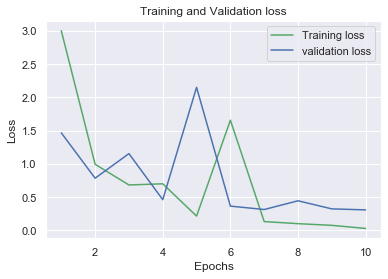

In [23]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

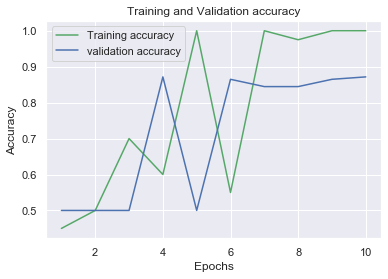

In [24]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
	# load the image
img = load_image(r'C:\Users\anita\Downloads\Coronahack-Chest-XRay-Dataset\Coronahack-Chest-XRay-Dataset\test\IM-0025-0001.jpeg')
# predict the class
result = model.predict(img)
if(result[0]==1):
  print("CORONA")
else:
  print("NORMAL")

NORMAL
